### EDA - Calorie Burning Regression Model

In [8]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 

In [9]:
# https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos/

directory = "datalake"
calorie = "calories.csv"
exercise = "exercise.csv"

calorie_path = os.path.join(directory, calorie)
exercise_path = os.path.join(directory, exercise)

calorie_df = pd.read_csv(calorie_path)
exercise_df = pd.read_csv(exercise_path)

In [10]:
consolidated_df = exercise_df.merge(calorie_df, on="User_ID")

In [11]:
consolidated_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
consolidated_df_ = consolidated_df.copy()
# consolidated_df_ = pd.get_dummies(consolidated_df_, columns=['Gender'], prefix=['Category'])
consolidated_df_['Gender'] = pd.factorize(consolidated_df_['Gender'])[0]
consolidated_df_


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


<AxesSubplot:xlabel='Height', ylabel='Weight'>

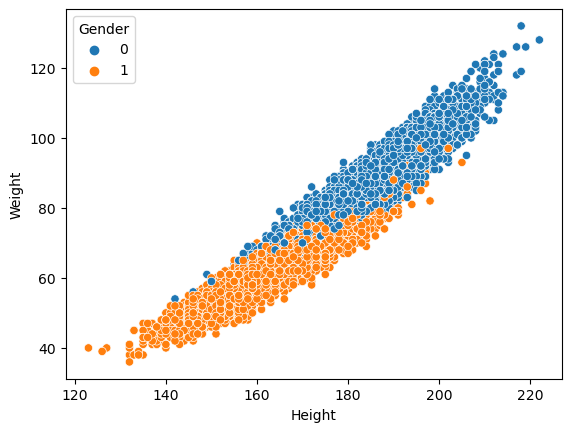

In [13]:
sns.scatterplot(data=consolidated_df_, x="Height", y="Weight", hue="Gender")

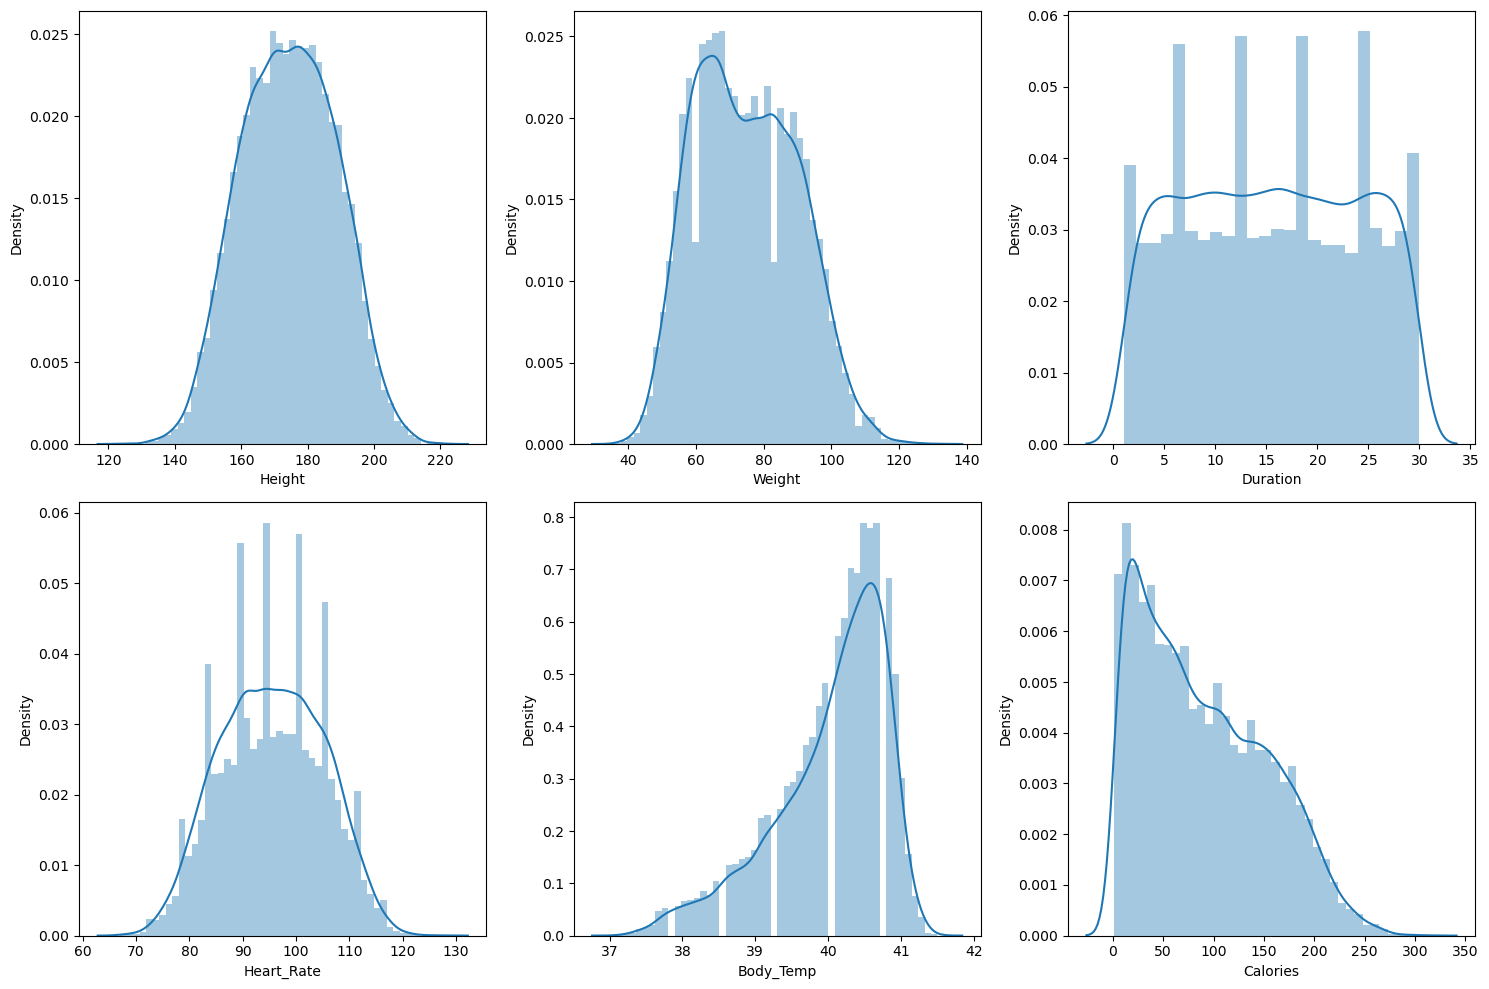

In [14]:
features = consolidated_df_.select_dtypes(include='float').columns 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 3, i + 1) 
	sns.distplot(consolidated_df_[col]) 
plt.tight_layout() 
plt.show() 


In [15]:
consolidated_df_.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


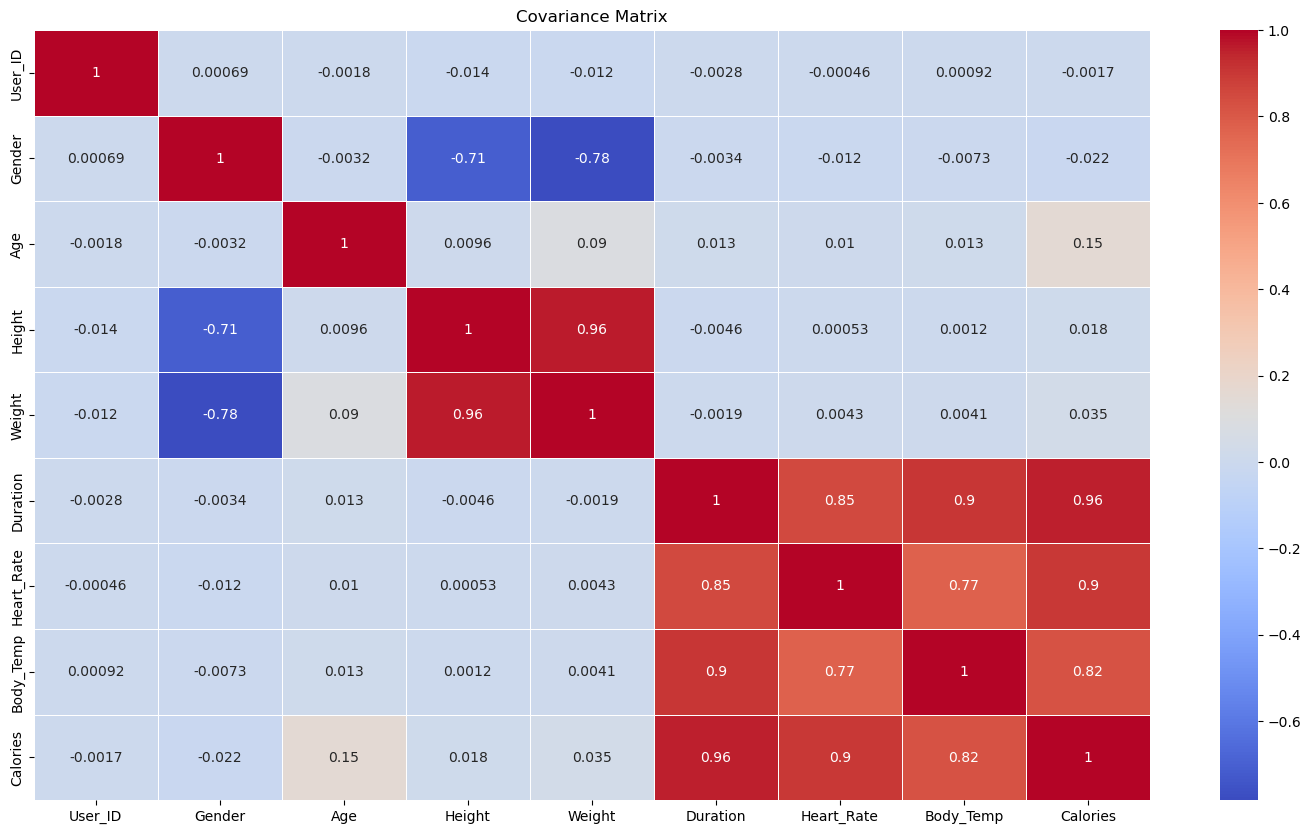

In [16]:
correlation_matrix = consolidated_df_.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Covariance Matrix")
plt.show()

In [17]:
# consolidated_df_ = consolidated_df_.drop(columns=['Height','Duration'])

### Data Processing

In [18]:
from sklearn.preprocessing import StandardScaler

# Segregate the data (X, y, x_train, x_test, y_train, y_test)
scaler = StandardScaler()
X = consolidated_df_.drop(columns=["User_ID","Calories"])
y = consolidated_df_['Calories']

X = scaler.fit_transform(X)
X


array([[-1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [ 0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [-1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [ 0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [-1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [-1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Training and Evaluating

In [21]:
# import regressors
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


models = [LinearRegression, Lasso, Ridge, SVR, SVC, XGBRegressor, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))


In [22]:
regression_metrics_df = pd.DataFrame({
    "Model": ["LinearRegression", "Lasso", "Ridge", "SVR", "SVC", "XGBRegressor", "DecisionTreeRegressor", "RandomForestRegressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
LinearRegression,8.279790,123.205988,11.099819,0.968424
Lasso,9.114160,148.017024,12.166225,0.962065
Ridge,8.279801,123.211248,11.100056,0.968423
SVR,2.413025,31.590481,5.620541,0.991904
SVC,7.903733,137.478133,11.725107,0.964766
XGBRegressor,1.542155,4.802978,2.191570,0.998769
DecisionTreeRegressor,3.403733,27.424000,5.236793,0.992972
RandomForestRegressor,1.767867,7.992531,2.827107,0.997952


In [ ]:
# import regressors
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler',StandardScaler()),('rf', RandomForestRegressor())])

In [24]:
from sklearn.preprocessing import StandardScaler

# Segregate the data (X, y, x_train, x_test, y_train, y_test)
X = consolidated_df_.drop(columns=["User_ID","Calories"])
y = consolidated_df_['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [25]:
y_pred = pipe.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.229815946666667
R-squared: 0.9976416580978663


In [28]:
# pipe.predict([[0,29, 182.0, 90.0, 30.0, 110.0, 39.0]])
pipe.predict([[0,70, 160.0, 110.0, 60.0, 120.0, 40.0]])


array([285.33])

In [ ]:
import pickle


with open('regression_pipeline-0.1.0.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [ ]:
# Load the trained model
with open('regression_pipeline-0.1.0.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

loaded_model.predict([[0,29, 182.0, 90.0, 30.0, 110.0, 39.0]])

array([194.2])

In [ ]:
loaded_model.predict([[0,70, 160.0, 110.0, 60.0, 120.0, 40.0]])

array([293.01])

### Conclusion: 

StandardScale + RandomForestRegressor